# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Partamos de la base que al solicitarnos la prediccion de una variable de interés (precio de un imueble) mediante la informacion de otras variables, estamos frente a un problema de regresión.

Creo que hay diferentes datos que me ayudaran a trabajar en el problema, creo que la **ubicacion** del inmueble va a ser un indicador clave, la **superficie** del mismo también ya que a mayor superficie de la propiedad... seguramente el precio de la misma va a ser mayor ya que se va a invertir en mas comodidades y materiales de construcción. Otro indicador que entra en juego y es muy importante son las **prestaciones** que va a tener el inmueble, ya sean la cantidad de cuartos, aires acondicionados, pileta, sauna, entre muchas prestaciones más. Asi como también el indicador que nos va a decir el **tipo de propiedad**, si es una casa, un duplex, un departamento, etc. Sabemos que las casas pueden llegar a ser mas caras porque las prestaciones que tienen no suelen ser las mismas que las de otras propiedades. 

Todos estos datos nos van a permitir obtener una relación entre el precio y cada una de las características de la propiedad, ya que suelen influir sobre el valor de las propiedades.

Estos datos los puedo obtener de bases de datos de inmobiliarias o de portales inmobiliarios. En este caso los sacare del dataset de propiedades en venta brindado por Acamica para realizar el proyecto: ¨Dataset Properati (DSProyecto01DatosProperati.csv)¨

Para poder resolver estas dudas y comprobar estas hipótesis sobre el precio, a continuación, se llevará a cabo un análisis exploratorio de los datos provistos por el dataset de Properati con el propósito de averiguar cuáles son las variables presentes en el dataset capaces de asistir en la predicción del precio de las propiedades.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CARGO EL DATASET:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Primer Modelo de Machine Learning/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
# IMPRIMO LA CANTIDAD DE FILAS Y COLUMNAS
print('La cantidad de filas del dataset son: ' + str(df.shape[0]) + ', y la cantidad de columnas son: ' + str(df.shape[1]) + '.')

La cantidad de filas del dataset son: 146660, y la cantidad de columnas son: 19.


In [ ]:
# IMPRIMO LAS PRIMERAS 5 INSTANCIAS
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# NOMBRE DE LAS COLUMNAS:
print(df.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [ ]:
# VALORES FALTANTES POR COLUMNA:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64



Text(0.5, 1.0, 'Cantidad de propiedades por cada tipo')

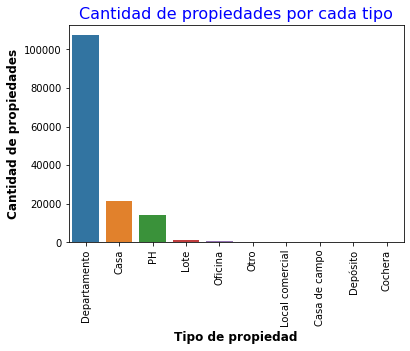

In [ ]:
# LOS TIPOS DE PROPIEDADES CON SUS INSTANCIAS SON LOS SIGUIENTES:
print(df['property_type'].value_counts())
print('')
propiedades = sns.countplot(data = df, x = 'property_type', 
                            order = df['property_type'].value_counts().index)
for i in propiedades.get_xticklabels():
    i.set_rotation(90)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada tipo", fontsize=16, color="blue")

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64



Text(0, 0.5, 'Cantidad de propiedades')

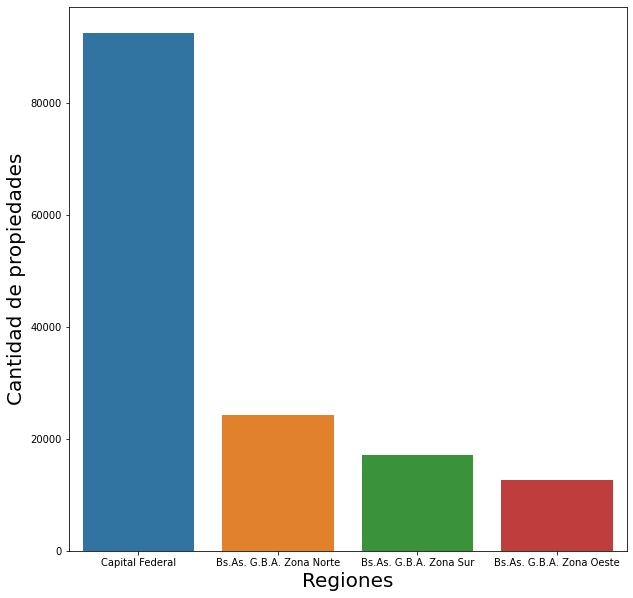

In [ ]:
# LAS REGIONES DE LAS PROPIEDADES SON LAS SIGUIENTES:
print(df['l2'].value_counts())
print('')
plt.figure(figsize=(10,10))
regiones = sns.countplot(data = df, x = 'l2', order = df['l2'].value_counts().index)
regiones.set_xlabel("Regiones",fontsize = 20)
regiones.set_ylabel("Cantidad de propiedades",fontsize = 20)

In [ ]:
#LOS BARRIOS DE LAS PROPIEDADES SON LOS SIGUIENTES:
with pd.option_context("display.max_rows", 1000):
    print(df['l3'].value_counts())

Palermo                 13073
Tigre                    8718
Almagro                  7527
Belgrano                 6935
Caballito                6650
Villa Crespo             6494
Recoleta                 5917
La Plata                 4354
La Matanza               3757
Pilar                    3709
Lomas de Zamora          3599
Villa Urquiza            3339
Vicente López            3251
Tres de Febrero          3240
Barrio Norte             3229
Balvanera                2992
Flores                   2556
Morón                    2312
San Isidro               2265
Nuñez                    1978
Quilmes                  1853
Lanús                    1839
General San Martín       1796
Puerto Madero            1757
Colegiales               1599
San Cristobal            1537
San Miguel               1450
Villa Devoto             1437
Escobar                  1419
Avellaneda               1370
Villa del Parque         1361
Parque Centenario        1318
Almirante Brown          1228
Moreno    

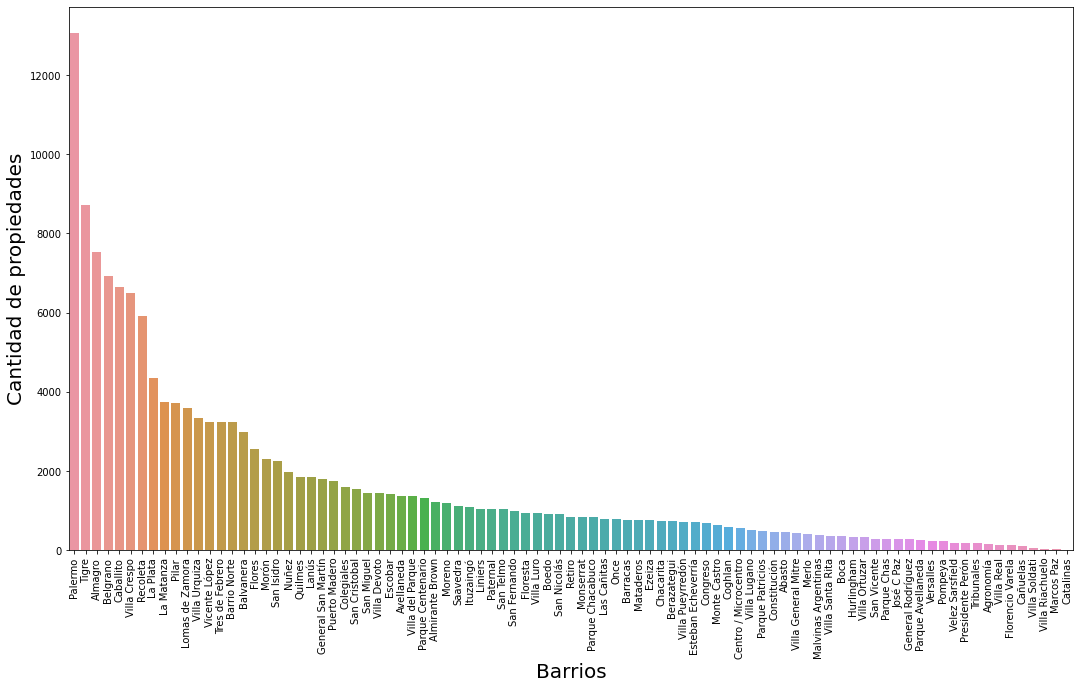

In [ ]:
plt.figure(figsize=(18,10))
barrios = sns.countplot(data = df, x = 'l3', order = df['l3'].value_counts().index)
barrios.set_xlabel("Barrios",fontsize = 20)
barrios.set_ylabel("Cantidad de propiedades",fontsize = 20)
for i in barrios.get_xticklabels():
    i.set_rotation(90)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

A PARTIR DE LOS RESULTADOS ANTERIORES:

**La región con más propiedades es:**

Capital Federal.

**Los 3 tipos de propiedad más importantes son:**

Departamento, con 107326 instancias. Casa, con 21521 instancias. PH, con 14298 instancias.

In [ ]:
mask = df.loc[df['property_type'] == 'Departamento']
mask2 = df.loc[df['property_type'] == 'PH']
mask3 = df.loc[df['property_type'] == 'Casa']
mask = mask.append(mask2)
mask = mask.append(mask3)
mask = mask.loc[df['l2'] == 'Capital Federal']
dataset = mask

In [ ]:
#LAS INSTANCIAS DEL NUEVO DATASET:
mask.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
# LA DISTRIBUCION DE LAS VARIABLES:
mask[['rooms', 'bedrooms', 'bathrooms', 
               'surface_total', 'surface_covered', 'price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Ahora vamos a graficar los histogramas de cada una de las variables continuas y los graficos de barras para las variables discretas con el fin de mostrar la distribucion de las mismas. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


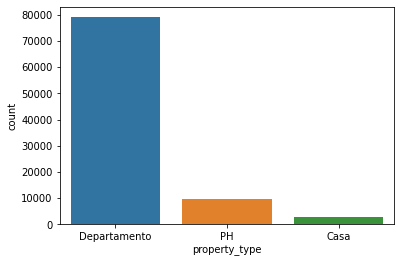

In [ ]:
sns.countplot(mask['property_type'])

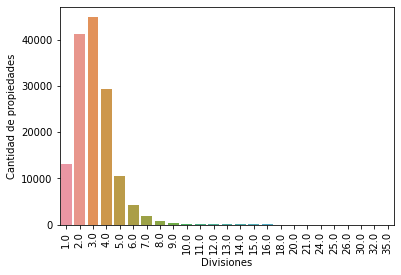

In [ ]:
sns.countplot(x = mask['rooms'])
chart = sns.countplot(data = df, x = 'rooms')
chart.set_xlabel("Divisiones")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

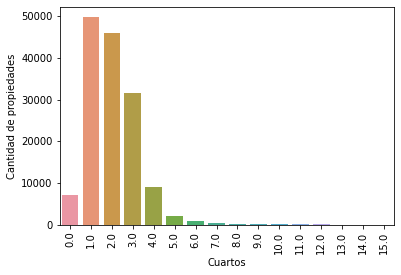

In [ ]:
sns.countplot(x = mask['bedrooms'])
chart = sns.countplot(data = df, x = 'bedrooms')
chart.set_xlabel("Cuartos")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

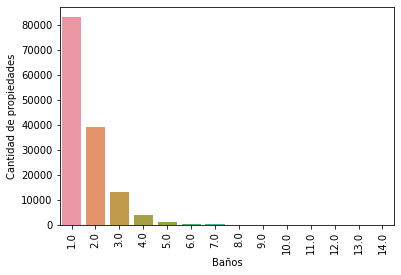

In [ ]:
sns.countplot(x = mask['bathrooms'])
chart = sns.countplot(data = df, x = 'bathrooms')
chart.set_xlabel("Baños")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


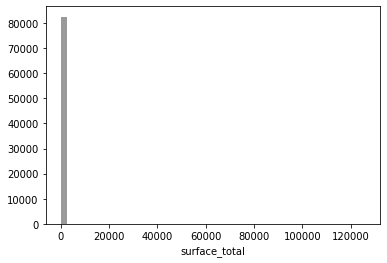

In [ ]:
sns.distplot(mask['surface_total'], kde = False, color = 'k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


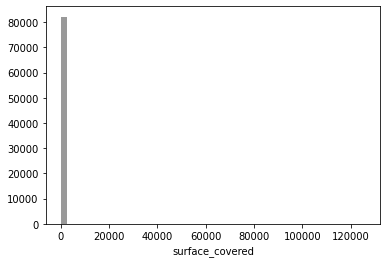

In [ ]:
sns.distplot(mask['surface_covered'], kde = False, color = 'k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


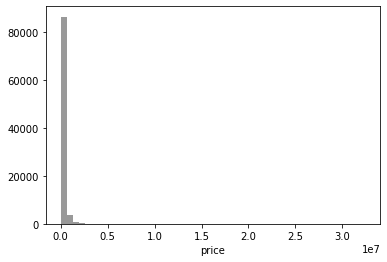

In [ ]:
sns.distplot(mask['price'], kde = False, color = 'k')

Observamos que los precios como las superficies tienen una desviacion estándar muy elevada, se tendría que realizar un tratamiento para corregir ese problema. El mismo puede estar pasando por la presencia de valores atípicos que aumentan la desviación e impidan ver el grafico de la distribución de las variables continuas.

Para poder ver esto vamos a hacer unos graficos boxplot sobre las variables continuas. Primero por las superficies:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


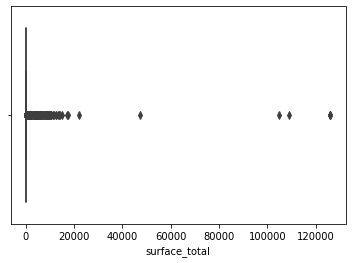

In [ ]:
sns.boxplot(mask['surface_total'])

Elejimos valores máximos y mínimos para filtrar las propiedades según su superficie:

In [ ]:
max = mask['surface_total'] > 150
mask = mask[~max]
min = mask['surface_total'] < 15
mask = mask[~min]
print(mask.shape)
print((mask.notna()).shape)

(79601, 19)
(79601, 19)


Ilustramos nuevamente una vez filtrados los datos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


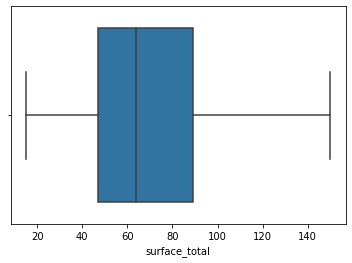

In [ ]:
sns.boxplot(mask['surface_total']) #BOXPLOT PARA DETERMINAR UN RANGO RAZONABLE

In [ ]:
mask.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,75977.000000,75963.000000,79601.000000,79601.000000,77546.000000,70684.000000,70437.000000,7.960100e+04
mean,-34.599189,-58.436685,2.687579,1.747428,1.386648,70.564017,65.831296,1.949822e+05
std,0.023563,0.035547,1.026162,0.884221,0.654088,30.238823,139.268860,1.725394e+05
min,-34.696419,-58.530467,1.000000,0.000000,1.000000,15.000000,1.000000,7.500000e+03
25%,-34.613715,-58.459700,2.000000,1.000000,1.000000,47.000000,42.000000,1.150000e+05
50%,-34.599900,-58.434263,3.000000,2.000000,1.000000,64.000000,57.000000,1.600000e+05
75%,-34.584907,-58.411980,3.000000,2.000000,2.000000,89.000000,79.000000,2.350000e+05
max,-34.535818,-58.353930,21.000000,15.000000,14.000000,150.000000,13402.000000,3.243423e+07


Ahora vamos a sacar las superficies cubiertas que son superiores a las superficies totales. Tal cual nos pedia la consigna que saquemos los valores atípicos, eliminaré los valores que no tienen logica ya que los mismos afectan de una manera u otra el análisis con respecto a la superficie.

In [ ]:
max = mask['surface_total'] >= mask['surface_covered']
max.sum()
mask = mask[max]
mask.shape

(69620, 19)

Nuevamente analizamos los resultados de las estadísticas y revisamos si mejoran para el análisis:

In [ ]:
mask.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,66279.000000,66279.000000,69620.000000,69620.000000,68897.000000,69620.000000,69620.000000,6.962000e+04
mean,-34.598390,-58.435505,2.703347,1.767811,1.362817,70.693809,63.249325,1.938945e+05
std,0.022904,0.034879,0.985293,0.835203,0.615348,30.219069,26.955239,1.695646e+05
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,15.000000,1.000000,7.500000e+03
25%,-34.611812,-58.457405,2.000000,1.000000,1.000000,47.000000,42.000000,1.180000e+05
50%,-34.599074,-58.433189,3.000000,2.000000,1.000000,64.000000,57.000000,1.630000e+05
75%,-34.584909,-58.411767,3.000000,2.000000,2.000000,89.000000,79.000000,2.355000e+05
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,150.000000,150.000000,3.243423e+07


Ahora veo y reviso los valores anormales en los precios asi lo puedo corregir:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


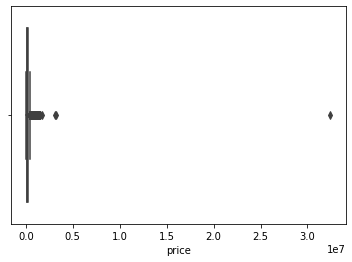

In [ ]:
sns.boxplot(mask['price'])

Le aplicamos un filtrado maximo según lo ilustrado en el boxplot:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


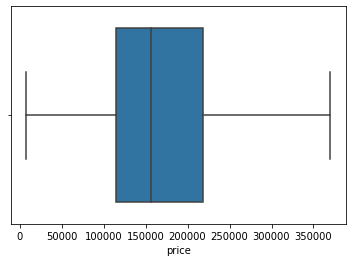

In [ ]:
maxs = mask['price'] > 370000
mask = mask[~maxs]
sns.boxplot(mask['price'])

Al haber hecho los cambios en las variables continuas, graficare de nuevo los graficos de barras para las variables discretas, y los histogramas para las continuas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


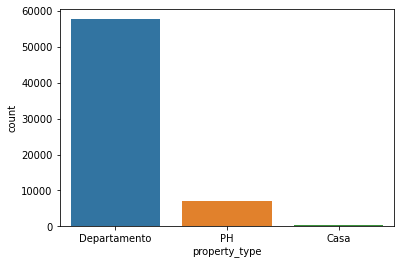

In [ ]:
sns.countplot(mask['property_type'])

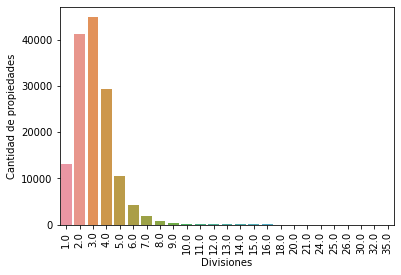

In [ ]:
sns.countplot(x = mask['rooms'])
chart = sns.countplot(data = df, x = 'rooms')
chart.set_xlabel("Divisiones")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

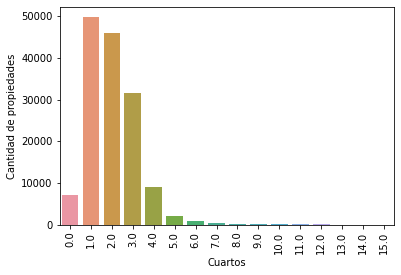

In [ ]:
sns.countplot(x = mask['bedrooms'])
chart = sns.countplot(data = df, x = 'bedrooms')
chart.set_xlabel("Cuartos")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

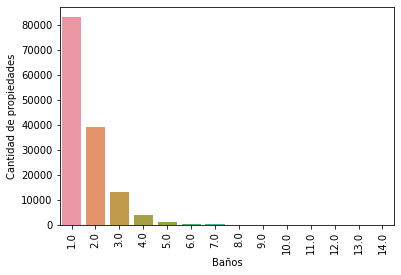

In [ ]:
sns.countplot(x = mask['bathrooms'])
chart = sns.countplot(data = df, x = 'bathrooms')
chart.set_xlabel("Baños")
chart.set_ylabel("Cantidad de propiedades")
for i in chart.get_xticklabels():
    i.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


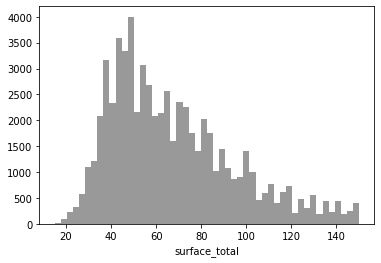

In [ ]:
sns.distplot(mask['surface_total'], kde = False, color = 'k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


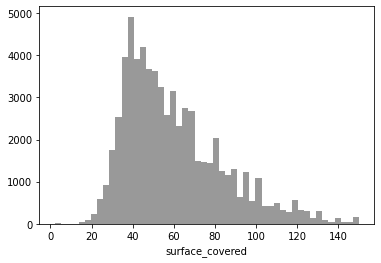

In [ ]:
sns.distplot(mask['surface_covered'], kde = False, color = 'k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


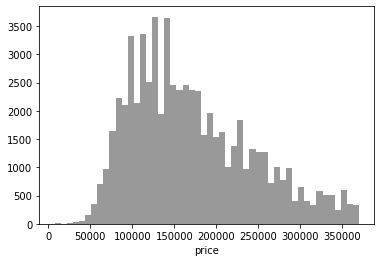

In [ ]:
sns.distplot(mask['price'], kde = False, color = 'k')

Se puede ver que las distribuciones de las variables continuas tienen las medidas con una ligera tendencia hacia la izquierda (eje y).

Ya corregidos todos los datos, hacemos el PAIRPLOT para las variables importantes y analizo:

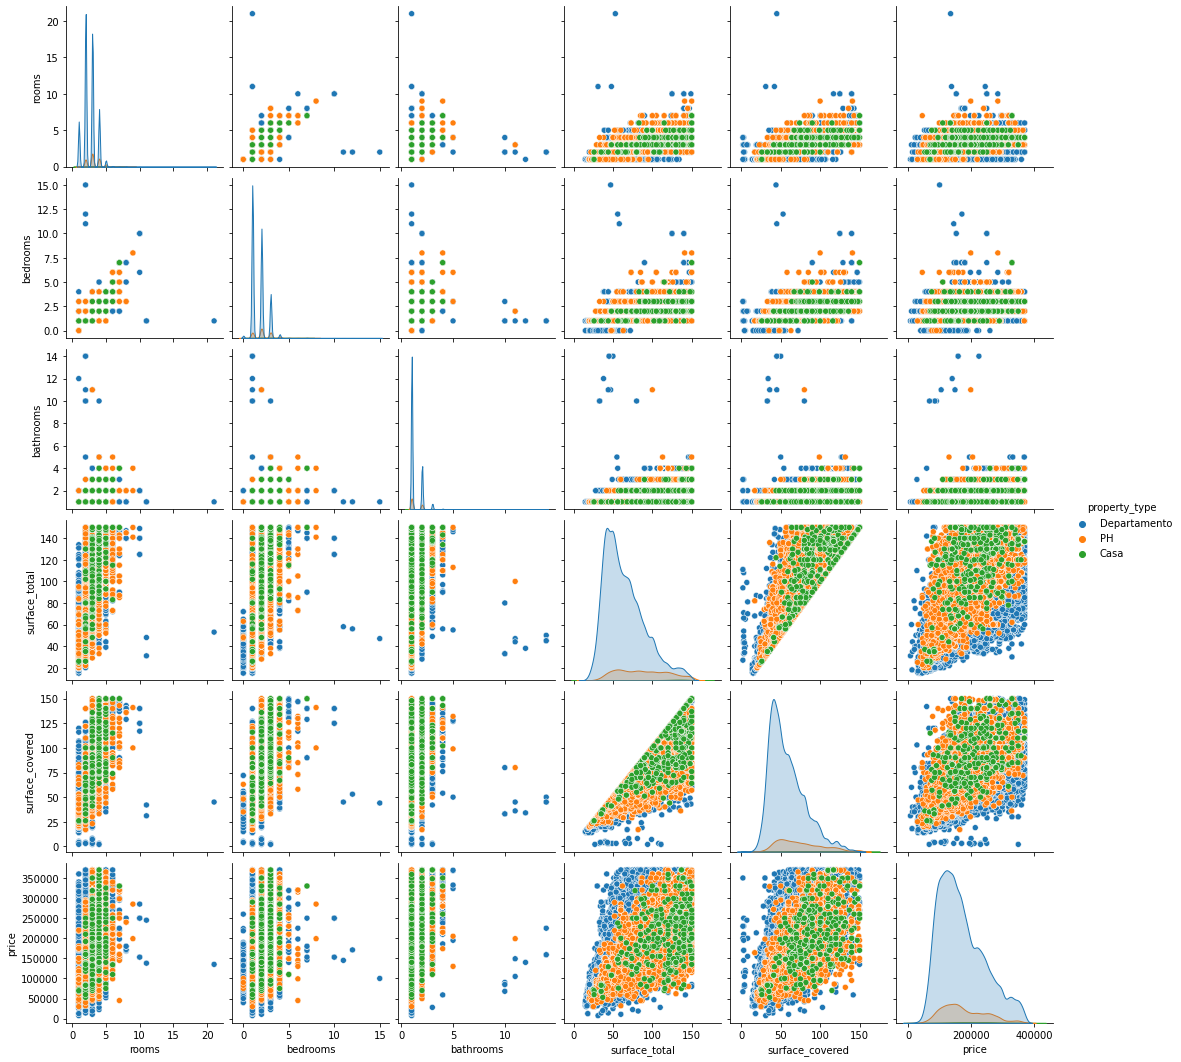

In [ ]:
sns.pairplot(mask[['property_type','rooms', 'bedrooms', 'bathrooms', 
                   'surface_total', 'surface_covered', 'price']],
             hue = 'property_type')

A partir del grafico PAIRPLOT, se puede observar que la superficie total de los departamentos tiene una distribución orientada hacia la izquierda, la de los PH está más centrada, y la de las casas tiene una tendencia a permanecer más hacia la derecha.

Además, se puede ver que con respecto a los precios, los departamentos y PH tienen una distribución similar orientada hacia la izquierda, mientras que la de las casas están orientadas hacia la derecha.

In [ ]:
mask.groupby(['property_type']).size()

property_type
Casa              349
Departamento    57631
PH               6986
dtype: int64

In [ ]:
np.std(mask['property_type'] == 'Departamento')

0.31647689500177295

In [ ]:
np.std(mask['property_type'] == 'PH')

0.30978990992204114

In [ ]:
np.std(mask['property_type'] == 'Casa')

0.07309707201972786

Vemos que a mayor altura en el grafico la desviación estándar es mayor.


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
mask[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.926065,0.461440,0.752829,0.799091,0.563976
bedrooms,0.926065,1.000000,0.467859,0.737491,0.790042,0.542285
bathrooms,0.461440,0.467859,1.000000,0.530198,0.554415,0.530339
surface_total,0.752829,0.737491,0.530198,1.000000,0.922115,0.723172
surface_covered,0.799091,0.790042,0.554415,0.922115,1.000000,0.721477
price,0.563976,0.542285,0.530339,0.723172,0.721477,1.000000


Aplicando a la matriz de correlaciones un heatmap para visualizar la intensidad de las correlaciones entre cada variable:

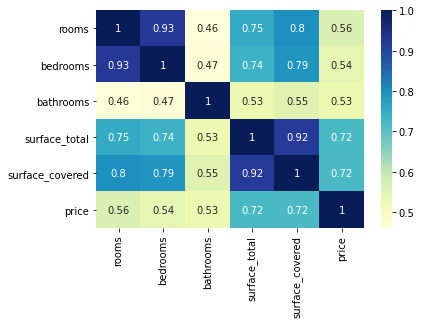

In [ ]:
sns.heatmap(mask[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(), 
            cmap = "YlGnBu", annot = True)

Ahora debemos separar el dataset por tipo de propiedad para poder hacer un análisis más detallado:

In [ ]:
departamentos = mask.loc[df['property_type'] == 'Departamento']
ph = mask.loc[df['property_type'] == 'PH']
casa = mask.loc[df['property_type'] == 'Casa']

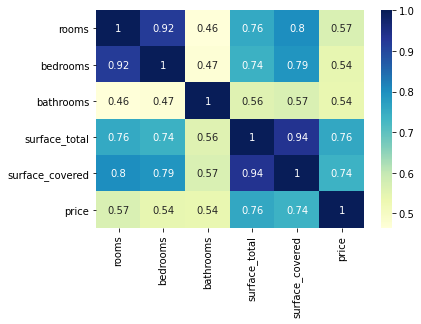

In [ ]:
sns.heatmap(departamentos[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(),
            cmap = "YlGnBu", annot = True)

En base a los resultados ilustrados con las correlaciones de variables de los departamentos se puede observar que hay una gran correlación entre la superficie total y la cubierta, de 0.94, que no está tan remarcada en los otros tipos de propiedades.

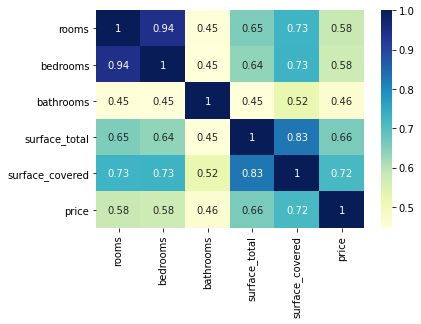

In [ ]:
sns.heatmap(ph[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(),
            cmap = "YlGnBu", annot = True)

A partir de esta matriz de correlaciones se puede ver que en los PH la correlación entre la superficie total y la cubierta disminuye considerablemente. Además, se puede ver que la correlación entre los cuartos y baños, y la superficie total también disminuye.

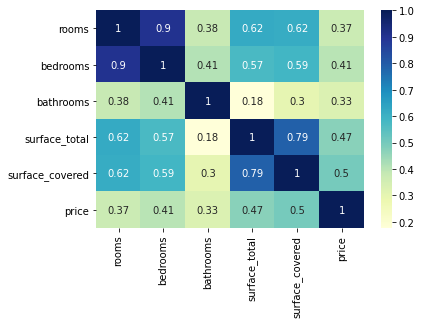

In [ ]:
sns.heatmap(casa[['rooms', 'bedrooms', 'bathrooms', 
         'surface_total', 'surface_covered', 'price']].corr(),
            cmap = "YlGnBu", annot = True)

Vemos como cambia esta matriz de correlación con respecto a las otras, en la misma se puede apreciar que la correlación entre los baños y las superficies cubiertas cae abruptamente a 0.18. Además, caen las correlaciones entre el precio y las cuartos y baños.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Pregunta: **¿Cuál es el barrio más caro de Buenos Aires? **

Para averiguar cuál es el barrio más caro dentro del dataset, se debe utilizar un catplot para averiguar la relación entre las variable categórica de los barrios y la continua de los precios.

Primero se utiliza un catplot del tipo "bar" para poder ver la tendencia de precios de propiedades media en cada barrio de CABA. Se puede observar en el siguiente gráfico que los precios de Puerto Madero sobresalen abruptamente al resto de los de los otros barrios.

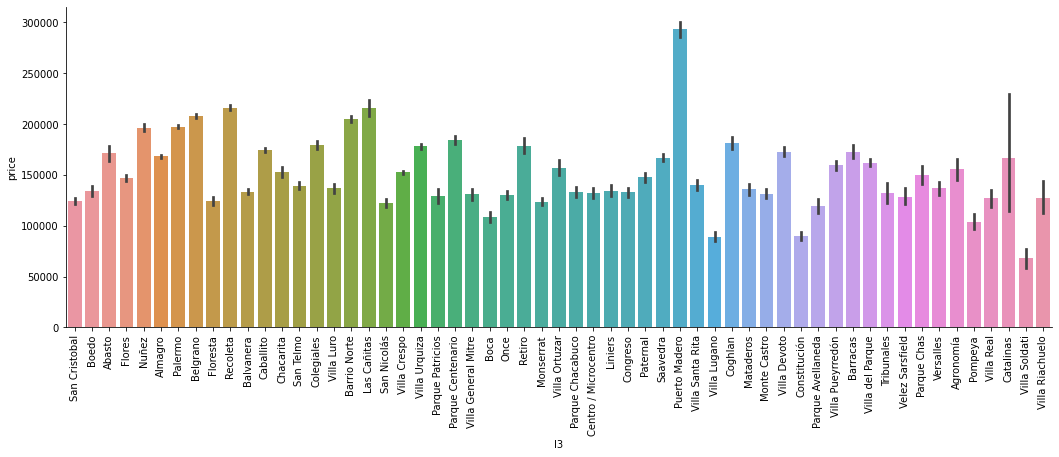

In [ ]:
cat = sns.catplot(data = mask, x = "l3", y = "price", 
                  kind = 'bar', height = 5, aspect = 3)
cat.set_xticklabels(rotation = 90)

Luego, usamos el gráfico de boxplot y vemos también como está compuesto la distribución de cada barrio de CABA. Se puede apreciar, por ejemplo, que los precios más bajos de Puerto Madero se encuentran casi a la misma altura de los precios medios de Recoleta.

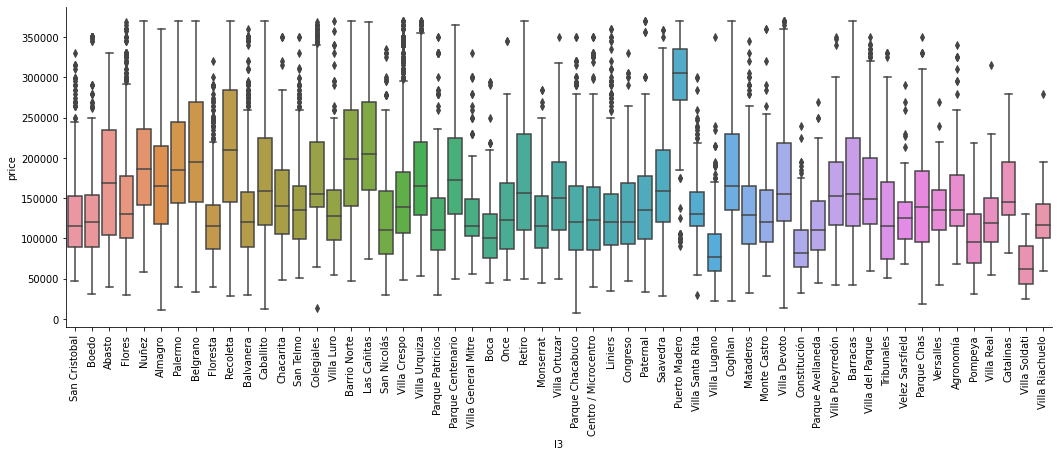

In [ ]:
filter = mask.price < 2500000
filter = mask[filter]
cat = sns.catplot(data = filter, x = "l3", y = "price", 
                  kind = 'box', height = 5, aspect = 3)
cat.set_xticklabels(rotation = 90)

Para reforzar la visión de los precios altos de la zona de Puerto Madero con respecto al resto, se utilizó el gráfico de violin para poder visualizar la distribución de precios de cada barrio de CABA de manera distinta que con el boxplot. Los elevados precios de Puerto Madero siguen sobresaliendo al resto en la ilustración que veremos acontinuación:

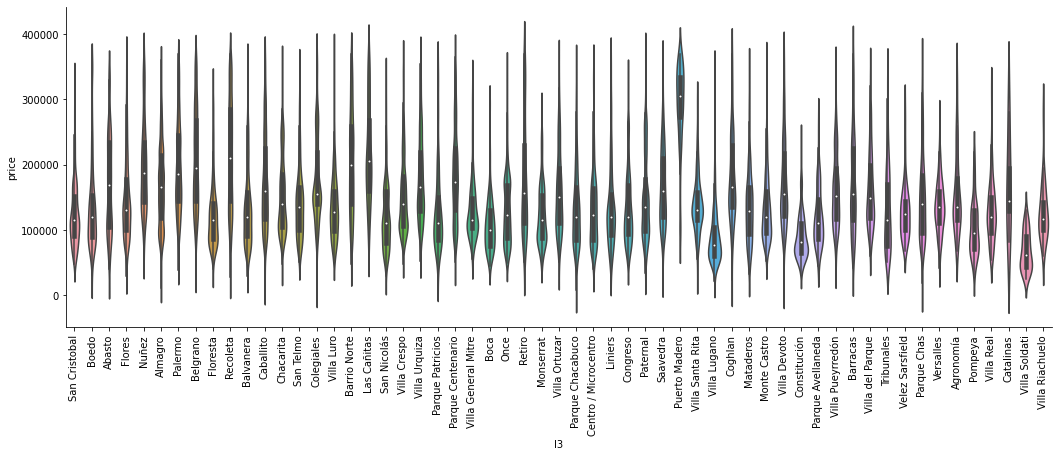

In [ ]:
cat = sns.catplot(data = filter, x = "l3", y = "price", 
                  kind = 'violin', height = 5, aspect = 3)
cat.set_xticklabels(rotation = 90)

Habiendo ya hecho un análisis de los barrios más caros de CABA, se proseguirá analizar un poco al barrio Puerto Madero en si:

In [ ]:
madero = mask.l3 == 'Puerto Madero'
madero = mask[madero]

In [ ]:
madero.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,214.000000,214.000000,271.000000,271.000000,269.000000,271.000000,271.000000,271.000000
mean,-34.614855,-58.365919,1.940959,1.184502,1.405204,60.420664,56.354244,293028.306273
std,0.005759,0.017258,0.712469,0.416222,0.514102,15.455078,13.862285,62219.158533
min,-34.624782,-58.469540,1.000000,0.000000,1.000000,27.000000,24.000000,89999.000000
25%,-34.617384,-58.363549,1.000000,1.000000,1.000000,51.000000,48.000000,272500.000000
50%,-34.615682,-58.362754,2.000000,1.000000,1.000000,60.000000,57.000000,305001.000000
75%,-34.615027,-58.361489,2.000000,1.000000,2.000000,69.000000,65.000000,335000.000000
max,-34.582789,-58.359396,5.000000,3.000000,4.000000,140.000000,119.000000,370000.000000


Se puede observar en las descripciones que el precio medio de una propiedad en Puerto Madero ronda entre los 300.000 USD con un desvío estándar de 62.000 USD. Para las condiciones de filtrado planteadas anteriormente.

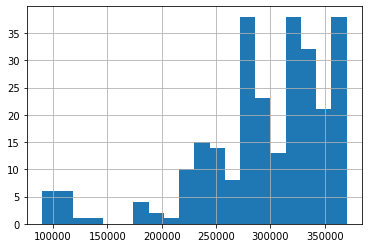

In [ ]:
madero['price'].hist(bins = 20)

Con el histograma, vemos que se puede ilustrar la tendencia hacia la derecha que tienen los precios de las propiedades en Puerto Madero.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

Ahora vamos a cargar de nuevo el dataset y le aplicaremos el filtrado de datos solicitado por la consigna, en este caso, se filtrará para que queden solamente las instancias de:

 **Departamentos, PHs y Casas** 

In [3]:
# CARGO EL DATASET:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Primer Modelo de Machine Learning/DS_Proyecto_01_Datos_Properati.csv")
mask = df.l2 == 'Capital Federal'
mask = df[mask]
mask1 = mask['property_type'] == 'Departamento'
mask1 = mask[mask1]
mask2 = mask['property_type'] == 'PH'
mask2 = mask[mask2]
mask3 = mask['property_type'] == 'Casa'
mask3 = mask[mask3]
mask1 = mask1.append(mask2)
mask1 = mask1.append(mask3)
dataset = mask1

Ahora aplicaremos un filtrado para eliminar las propiedades con:

- Superficie inferior a 15 m² y superior a 1000 m².
- Precio superior a 4000000 dólares.
- Valores faltantes

In [4]:
mask1 = dataset.surface_total <= 1000
mask2 = dataset.surface_total >= 15
mask3 = dataset.price <= 4000000
dataset = dataset[mask1]
dataset = dataset[mask2]
dataset = dataset[mask3]
dataset = dataset[['rooms', 'bedrooms', 'bathrooms', 
                   'surface_total', 'surface_covered', 'price']]
dataset = dataset.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Observamos en el código de arriba que se ha llegado al tamaño de datos indicado en la consigna: 81019 instacias y 6 columnas.

In [5]:
print(dataset.shape)

(81019, 6)


**Métricas de Evaluación del Modelo: Justificación**

Para evaluar el desempeño del modelo *Benchmark*, así como los modelos de KNN y y Árbol de Desiciónes, se necesitan métricas de evaluación a partir de las cuáles se pueda obtener dicha evaluación. Al ser un problema de determinación de una variable continua, el precio, a partir de otras variables provistas en el dataset, estamos ante un problema de Regresión de Machine Learning. Por ende, se tienen que selecionar métricas capaces de medir el error existente entre los valores etiquetados y los valores predichos. Para ello, se seleccionó la métrica de la *Raíz Cuadrada* del *Error Cuadrático Medio* ya que ilustra la diferencia entre ambos valores de manera intuitiva, por lo que a partir del mismo se puede llegar a una conclusión sobre el desempeño del modelo a evaluar con mayor rapidez y eficacia. Además, hay que tener en cuenta que gracias a las consignas provistas en este trabajo, se eliminaron gran parte de los valores átipicos, que son un fenómeno que tiene la capacidad de afectar la correcta interpretación de esta métrica al ser muy vulnerable a éste.

También, para poder contar con más información sobre el desempeño del modelo se ilustrarán otras métricas, en este caso:

* Error Cuadrático Medio.
* R² score.

Aunque el resultado de la Raíz Cuadrada del Error Cuadrático Medio va a ser el que más peso tenga en el criterio del análisis.

**Clase Generadora de Modelos de Machine Learning**

Para poder trabajar entrenando los modelos de Machine Learning de regresión propuestos en la consigna, vamos a crear una clase en Python que tenga como atributos los features a utilizar para entrenar al modelo:

- rooms.
- bedrooms.
- bathrooms.
- surface_total.
- surface_covered.

Y como target el feature:

- price.

Además, a la clase le agregamos el tipo de modelo de regresión que se desea entrenar, hay 3 opciones:

- Árbol.
- Benchmark
- Vecinos más cercanos (KNN).

La clase fue llamada con el nombre "Modelo", y aparte de los atribudos mencionados anteriormente, tiene ciertos métodos que permiten entrenar el modelo y mostrar sus resultados. Los métodos son los siguientes:

- seleccionarPartición(self, particion, mezcla, estado): Con el argumento partición, es posible dividir el dataset con el que trabaja en particiones. Debe recibir una variable tipo "float" cuyo valor va de 0 a 1 y no acepta otros valores. Con el argumento mezcla se puede setear si se desea mezclar o no los datos al particionarlos. Y por último, con el argumento estado se modifica el "random_state" para la mezcla de los datos. Estos 2 últimos argumentos se agregaron a la clase con el propósito de garantizar que todos los modelos puedan entrenarse con los mismos datos.

- entrenar(self, hiperparametro): Con el argumento hiperparámetro, es posible seleccionar tanto la profundidad máxima del árbol, como la cantidad de vecinos con la que trabajará el modelo de machine learning. En el caso de que se haya elegido como modelo al Benchmark, el hiperparámetro debe ser igual a 0, y los resultados de las predicciones devueltos tanto para el test, como para el entrenamiento es la media de la columna precios.

- def mostrarResultadosGraficos(self): Permite mostrar el desempeño del modelo entrenado, muestra un gráfico que ilustra el valor de los valores reales con etiquetas y los valores predichos. Además, se muestran ciertas métricas de evaluación como:

  - Error Cuadrático Medio.
  - R² del Error Cuadrático Medio.
  - R² score.

- def evaluarHiperparametros(self, inicio, fin, paso): Con este método de clase, es posible realizar una evaluación del modelo creado cambiando el hiperparámetro ya sea la profundidad del árbol o la cantidad de vecinos. Con el argumento inicio se elige el hiperparámetro a evaluar inicial, con fin se elige el último hiperparámetro a evaluar, y con paso, se elige el salto del valor de hiperparámetro con el que se dirige desde el inicio al fin. Una vez seleccionados los argumentos, se muestra el desempeño de los modelos de manera gráfica tanto con los datos de train como los de test. Las métricas utilizadas son:

  - Error Cuadrático Medio.
  - R² del Error Cuadrático Medio.
  - R² score.

In [6]:
class Modelo:
    
    def __init__(self, X, y, tipo_de_modelo):
        
        self.X = X
        self.y = y
        self.tipo_de_modelo = tipo_de_modelo
        
    def seleccionarParticion(self, particion, mezcla, estado):
        
        if particion > 1:
            return print('La partición de datos no puede ser superior al 100%')
        elif particion < 0:
            return print('La partición de datos no puede ser inferior al 0%')
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.X, 
                                                                self.y, 
                                                                test_size = particion, 
                                                                shuffle = mezcla, 
                                                                random_state = estado)
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test
            self.particion = particion
        
    def entrenar(self, hiperparametro):
        
        if self.tipo_de_modelo == 'Arbol':
            self.modelo = DecisionTreeRegressor(max_depth = hiperparametro)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.tipo_de_modelo == 'Vecinos':
            self.modelo = KNeighborsRegressor(n_neighbors = hiperparametro, weights = 'distance')
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.tipo_de_modelo == 'Benchmark' and hiperparametro == 0:
            self.y_train_pred = np.full(self.y_train.shape, dataset['price'].mean())
            self.y_test_pred = np.full(self.y_test.shape, dataset['price'].mean())
        else:
            print('No se eligió un modelo apropiado para entrenar')
            return None
        
        self.mse_train = mean_squared_error(self.y_train, self.y_train_pred)
        self.mse_test = mean_squared_error(self.y_test, self.y_test_pred)
        self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
        self.r2_train = r2_score(self.y_train, self.y_train_pred)
        self.r2_test = r2_score(self.y_test, self.y_test_pred)
    
    def mostrarResultadosGraficos(self):
        print('Las métricas de desempeño del modelo con los datos de entrenamiento son:')
        print('El error medio absoluto: ' + str(self.mse_train))
        print('La R² del error medio absoluto: ' + str(self.rmse_train))
        print('R2 Score: ' + str(self.r2_train))
        print('')
        print('Las métricas de desempeño del modelo con los datos de test son:')
        print('El error medio absoluto: ' + str(self.mse_test))
        print('La R² del error medio absoluto: ' + str(self.rmse_test))
        print('R2 Score: ' + str(self.r2_test))
        plt.figure(figsize = (15,10))
        ax = plt.subplot(1,2,1)
        ax.scatter(self.y_train, self.y_train_pred, s = 2)
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
        ax.plot(lims, lims, 'r-', alpha = 0.75, zorder = 0)
        plt.title('Valores de entrenamiento originales y predichos por el modelo')
        print('')
        plt.xticks(rotation = 45)
        plt.xlabel('y (train)')
        plt.ylabel('y_pred (train)')
        plt.tight_layout()
        #plt.show()
        ax = plt.subplot(1,2,2)
        plt.title('Valores de test originales y predichos por el modelo')
        print('')
        ax.scatter(self.y_test, self.y_test_pred, s = 2)
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
        ax.plot(lims, lims, 'r-', alpha = 0.75, zorder = 0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
        plt.xticks(rotation = 45)
        plt.tight_layout()
        plt.show()
        
    def evaluarHiperparametros(self, inicio, fin, paso):
        lista_mse_train = []
        lista_mse_test = []
        lista_rmse_train = []
        lista_rmse_test = []
        lista_r2_train = []
        lista_r2_test = []
        self.hiperparametros = np.arange(inicio, fin, paso)
        for k in self.hiperparametros:
            if self.tipo_de_modelo == 'Arbol':
                clf = DecisionTreeRegressor(max_depth = k)
                self.etiqueta = 'Profundidad' 
            elif self.tipo_de_modelo == 'Vecinos':
                clf = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
                self.etiqueta = 'Vecinos'
            else:
                print('No se eligió un modelo apropiado para entrenar')
                return None
            clf.fit(self.X_train, self.y_train)
            self.y_train_pred = clf.predict(self.X_train)
            self.mse_train = mean_squared_error(self.y_train, self.y_train_pred)
            self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
            self.r2_train = r2_score(self.y_train, self.y_train_pred)
            self.y_test_pred = clf.predict(self.X_test)
            self.mse_test = mean_squared_error(self.y_test, self.y_test_pred)
            self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
            self.r2_test = r2_score(self.y_test, self.y_test_pred)
            lista_rmse_train.append(self.rmse_train)
            lista_rmse_test.append(self.rmse_test)
            lista_mse_train.append(self.mse_train)
            lista_mse_test.append(self.mse_test)
            lista_r2_train.append(self.r2_train)
            lista_r2_test.append(self.r2_test)
        plt.plot(self.hiperparametros, lista_mse_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_mse_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('Error Cuadrático Medio')
        plt.show()
        
        plt.plot(self.hiperparametros, lista_rmse_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_rmse_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('R² de Error Cuadrático Medio')
        plt.show()
        
        plt.plot(self.hiperparametros, lista_r2_train,'o-',label='train')
        plt.plot(self.hiperparametros, lista_r2_test,'o-',label='test')
        plt.legend()
        plt.xlabel('Hiperparámetro de ' + str(self.etiqueta))
        plt.ylabel('R2 Score')
        plt.show()

**Construcción de Modelo Benchmark**

Para poder realizar un modelo de *Benchmark*, se optó por tomar el promedio de los precios y crear un arreglo de numpy que posea el mismo tamaño que el de la columna de precios del dataset de Properati. Cada valor perteneciente a cada instancia de la columna sería el mismo que el del promedio los precios obtenidos del dataset:

In [7]:
Benchmark = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']], 
                        dataset['price'], 'Benchmark')

Dividimos al dataset de entrenamiento que usará el árbol con una separación de:

- 70% Entrenamiento.
- 30% Test.

In [8]:
Benchmark.seleccionarParticion(particion = 0.3, mezcla = True, estado = 15)

In [9]:
Benchmark.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [10]:
Benchmark.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Para utilizar el modelo Benchmark, debemos colocar un 0 al valor del hiperparámetro.

In [11]:
Benchmark.entrenar(0)

Una vez entrenado, vemos el desempeño del modelo mostrando las métricas de evaluación y el resultado de las predicciones comparado con el resultado de las etiquetas originales. Esto se hace tanto con los datos de entrenamiento, como con los de test.

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 90301968659.46579
La R² del error medio absoluto: 300502.85965272575
R2 Score: -3.1921119081346205e-09

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 87195157166.78305
La R² del error medio absoluto: 295288.261139489
R2 Score: -1.799787585632373e-08




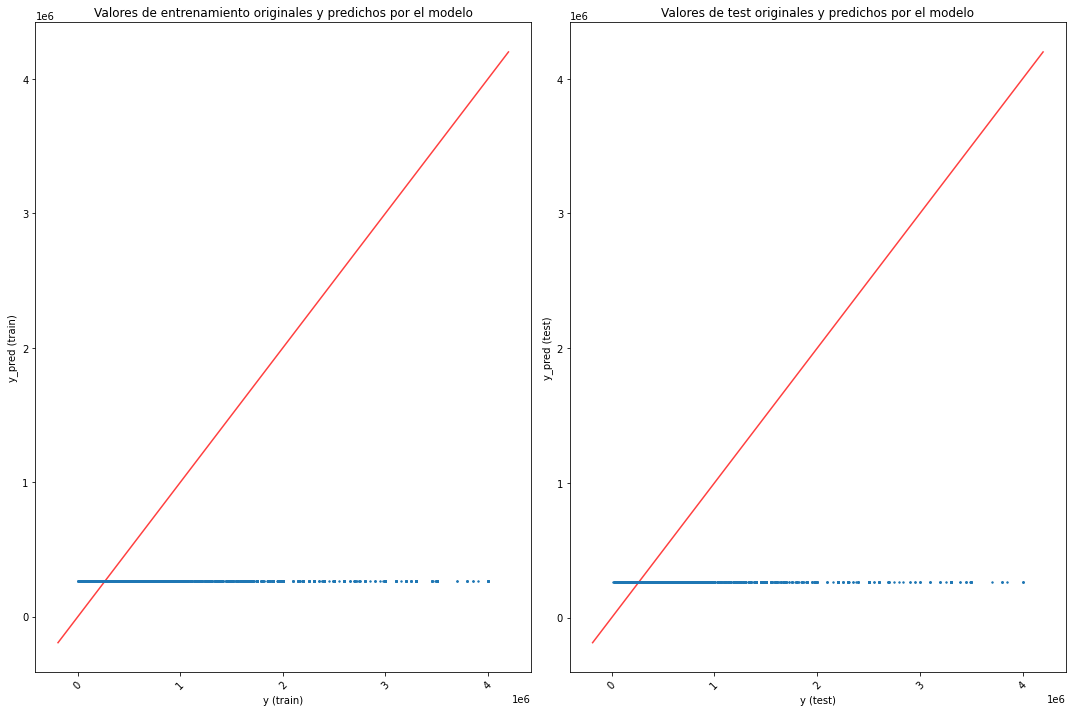

In [12]:
Benchmark.mostrarResultadosGraficos()

**Construcción de Modelos KNN y Árbol**

Una vez evaluado el modelo Benchmark, vamos a hacer 2 modelos de regresión de Machine Learning. Uno de Árbol de Decisiones, y uno de Vecinos más Cercanos (KNN).

In [13]:
Arbol = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 
                        'surface_total', 'surface_covered']], 
               dataset['price'], 'Arbol')

Divido al dataset de entrenamiento que usará el árbol con una partición de:

- 70% Entrenamiento.
- 30% Test.

**Aclaración:** El entrenamiento debe realizarse con los mismos datos que con el Benchmark, por lo que debe utilizarse un random_state igual al de modelo *Benchmark* por lo que se optó porque todos hagan la partición de datos con el random_state = 15 para poder garantizar el entrenamiento hecho con el mismo ordenamiento de datos.

In [14]:
Arbol.seleccionarParticion(particion = 0.3, mezcla = True, estado = 15)

In [15]:
Arbol.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [16]:
Arbol.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Tomamos el valor de profundidad máxima del árbol de decisiones. En este caso es el número 3.

In [17]:
Arbol.entrenar(3)

Una vez entrenado, vemos el desempeño del modelo mostrando las métricas de evaluación y el resultado de las predicciones comparado con el resultado de las etiquetas originales. Esto se hace tanto con los datos de entrenamiento, como con los de test.

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 36987505419.29441
La R² del error medio absoluto: 192321.35975833368
R2 Score: 0.590402002454179

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 36389052151.40944
La R² del error medio absoluto: 190759.1469665595
R2 Score: 0.5826711713274202




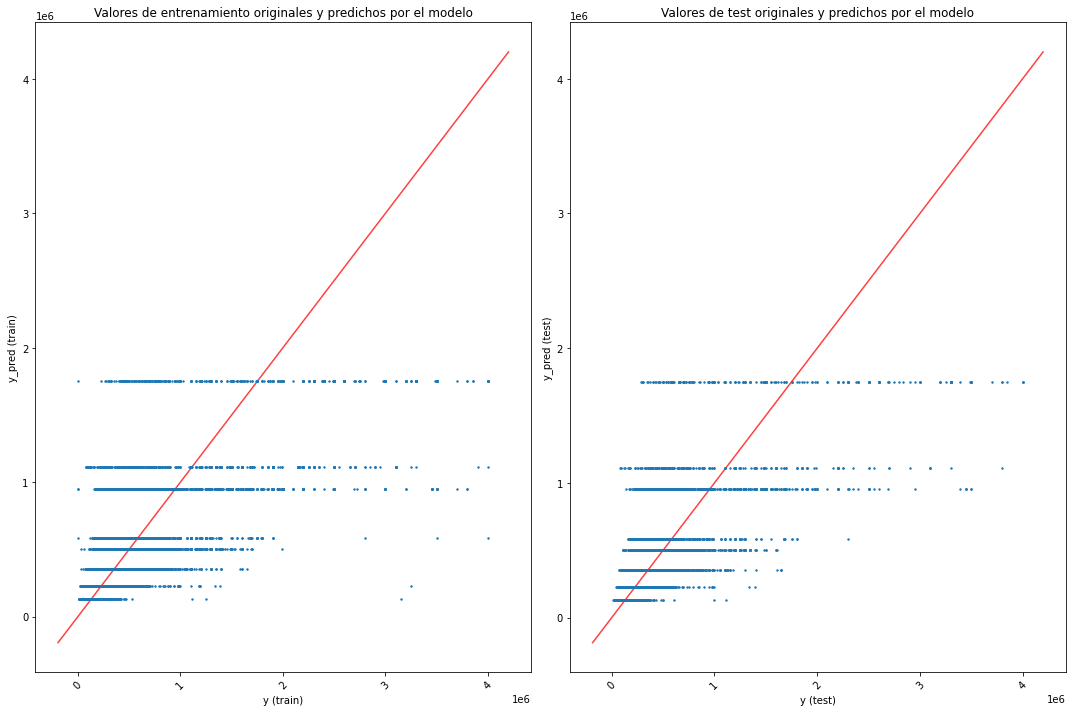

In [18]:
Arbol.mostrarResultadosGraficos()

Ahora hacemos lo mismo, pero cambiando el modelo por una regresión hecha con los vecinos más cercanos (KNN).

In [19]:
KNN = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 
                      'surface_total', 'surface_covered']], 
             dataset['price'], 'Vecinos')

In [20]:
KNN.seleccionarParticion(particion = 0.3, mezcla = True, estado = 15)

In [21]:
KNN.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [22]:
KNN.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Elegimos un modelo de 3 vecinos y vemos los resultados:

In [23]:
KNN.entrenar(3)

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 4398590389.838377
La R² del error medio absoluto: 66321.86961959364
R2 Score: 0.951290204752163

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 18675721691.70659
La R² del error medio absoluto: 136659.14419352476
R2 Score: 0.7858169807285533




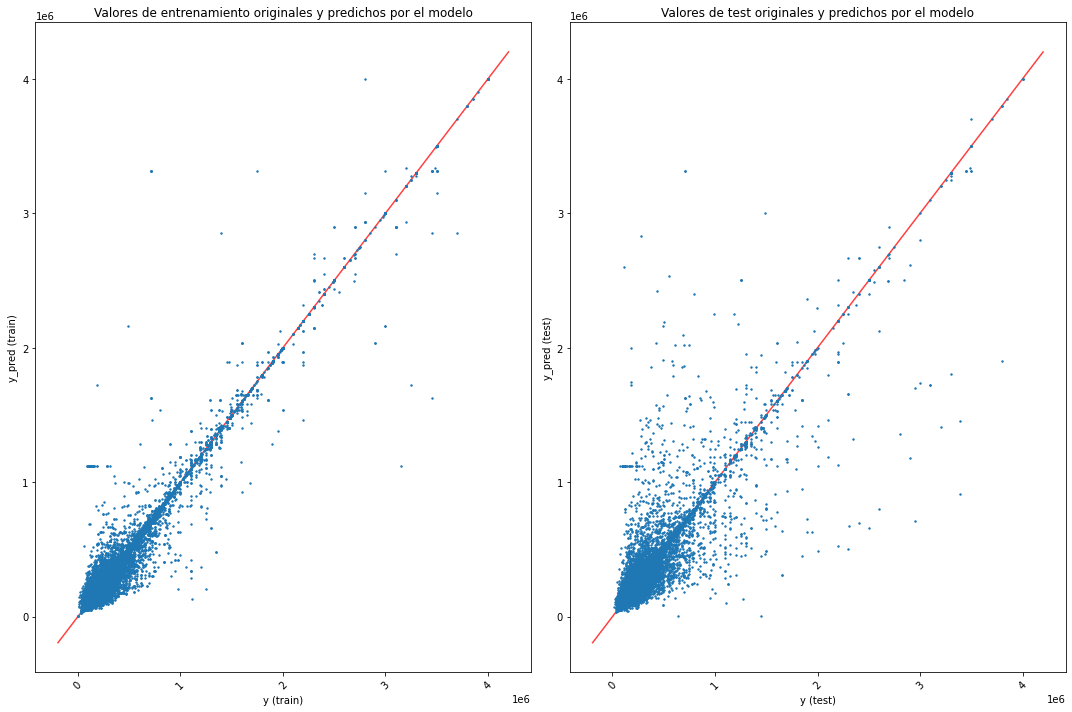

In [24]:
KNN.mostrarResultadosGraficos()

Viendo los resultados de estos 2 modelos se puede afirmar que son mucho mejores que los resultados del benchmark, dado que el Benchmark tiene un RMSE de casi  300.000  mientras que el Árbol tiene un RMSE aproximado de  190.000  y los Vecinos de  59.000.

Sin embargo podemos realizar ajustes en el valor del hiperparámetro.

Habiendo ya construido 2 modelos, vamos a evaluar cuál sería el mejor hiperparámetro para esta problemática tanto para el Árbol de Decisiones, como para los Vecinos más Cercanos. Para ello, se prosigue a graficar los errores del modelos en función del valor del hiperparámetro del mismo.

En el caso del Árbol de Decisiones:

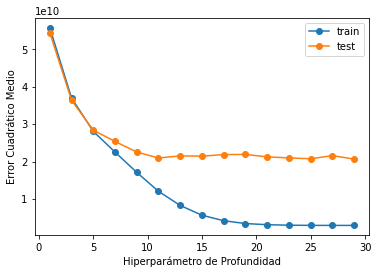

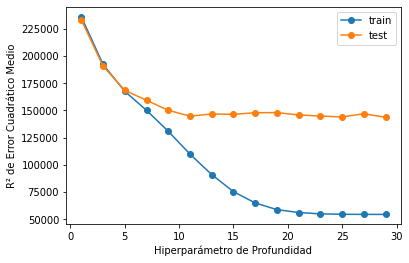

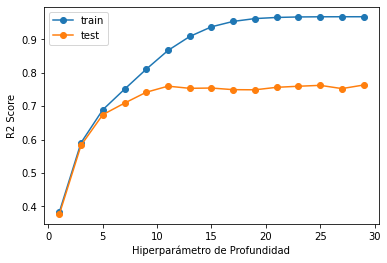

In [26]:
Arbol.evaluarHiperparametros(1,30,2)

En el caso de los Vecinos más Cercanos (KNN):

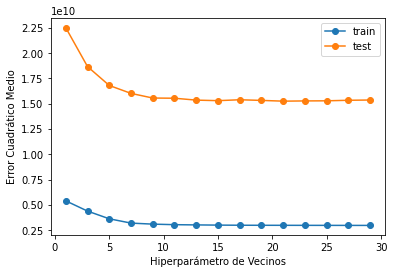

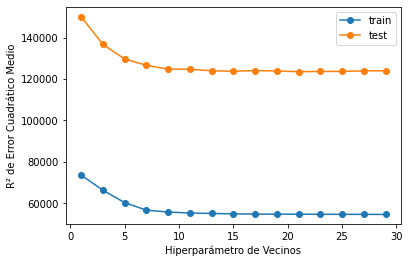

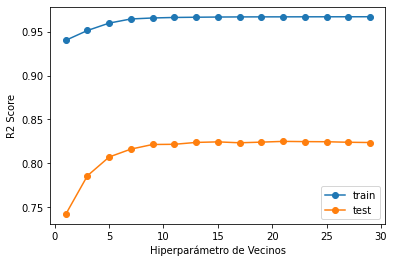

In [27]:
KNN.evaluarHiperparametros(1,30,2)

Al ver el resultado de los gráficos, se puede ver que la curva de la Raíz Cuadrada del Error Cuadrático Medio acentúa su baja ya con un valor de hiperparámetro de 15 tanto para la cantidad de vecinos, como para la profundidad del árbol.

**Luego de esta evaluación, se continuará con evaluar ambos modelos con sus respectivos hiperparámetros valuados en 15, no en 3 como se venia haciendo.** No se toman valores más altos que dicho valor para evitar que exista la posibilidad de "over - fitting".

In [28]:
KNN_15 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 
                      'surface_total', 'surface_covered']], 
             dataset['price'], 'Vecinos')
Arbol_15 = Modelo(dataset[['rooms', 'bedrooms', 'bathrooms', 
                        'surface_total', 'surface_covered']], 
               dataset['price'], 'Arbol')

In [29]:
Arbol_15.seleccionarParticion(particion = 0.3, mezcla = True, estado = 15)
KNN_15.seleccionarParticion(particion = 0.3, mezcla = True, estado = 15)

In [30]:
Arbol_15.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [31]:
Arbol_15.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


In [32]:
KNN_15.X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered
63781,2.0,1.0,2.0,137.0,68.0
14447,2.0,1.0,1.0,43.0,40.0
7612,4.0,3.0,2.0,171.0,110.0
24185,2.0,1.0,1.0,52.0,48.0
76129,4.0,3.0,2.0,99.0,95.0
...,...,...,...,...,...
97100,4.0,3.0,1.0,72.0,64.0
141527,4.0,3.0,4.0,188.0,150.0
16670,3.0,2.0,2.0,109.0,102.0
110625,3.0,2.0,2.0,95.0,95.0


In [33]:
KNN_15.X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered
95544,4.0,3.0,3.0,94.0,87.0
114820,4.0,3.0,3.0,120.0,120.0
107548,5.0,4.0,3.0,207.0,203.0
93608,2.0,1.0,1.0,39.0,36.0
117962,3.0,2.0,1.0,72.0,55.0
...,...,...,...,...,...
138097,2.0,1.0,1.0,68.0,57.0
75774,6.0,3.0,5.0,509.0,447.0
33074,5.0,4.0,4.0,335.0,280.0
95844,2.0,1.0,1.0,38.0,38.0


Seleccionamos los hiperparámetros apropiados justificados en las lineas anteriores:

In [34]:
Arbol_15.entrenar(15)
KNN_15.entrenar(15)

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 5688729125.313543
La R² del error medio absoluto: 75423.66422624628
R2 Score: 0.9370032655110195

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 21397071536.550766
La R² del error medio absoluto: 146277.37875881823
R2 Score: 0.75460710643912




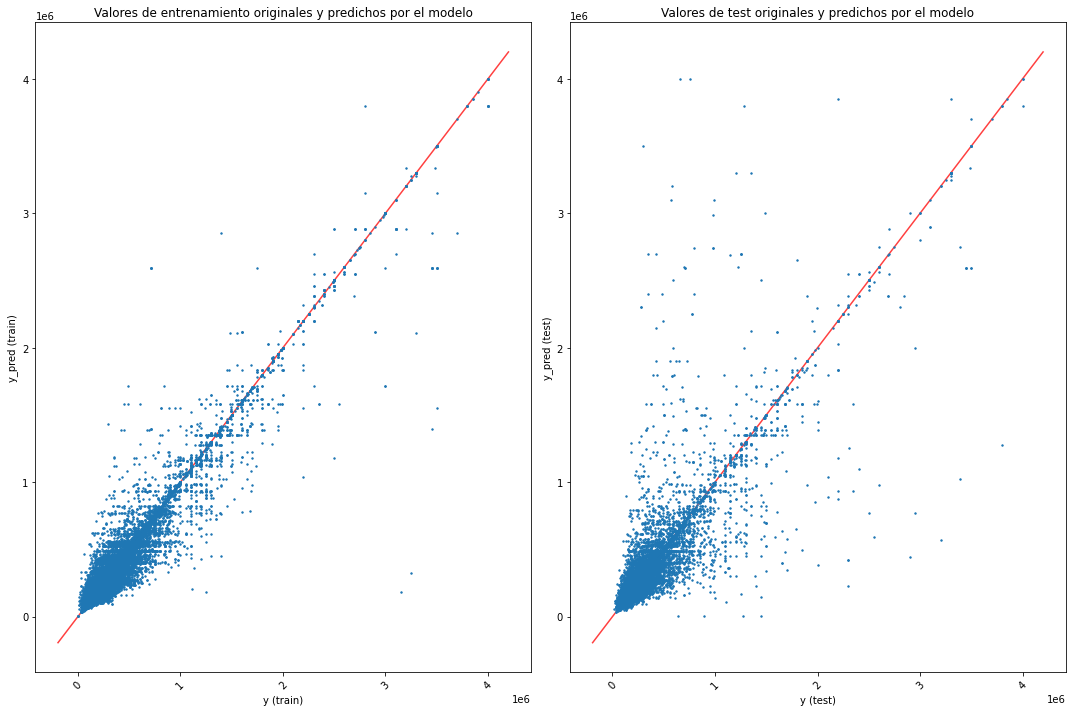

In [35]:
Arbol_15.mostrarResultadosGraficos()

Las métricas de desempeño del modelo con los datos de entrenamiento son:
El error medio absoluto: 3013952675.785652
La R² del error medio absoluto: 54899.477919062694
R2 Score: 0.9666236214985265

Las métricas de desempeño del modelo con los datos de test son:
El error medio absoluto: 15309613058.781517
La R² del error medio absoluto: 123732.0211537075
R2 Score: 0.8244212886153932




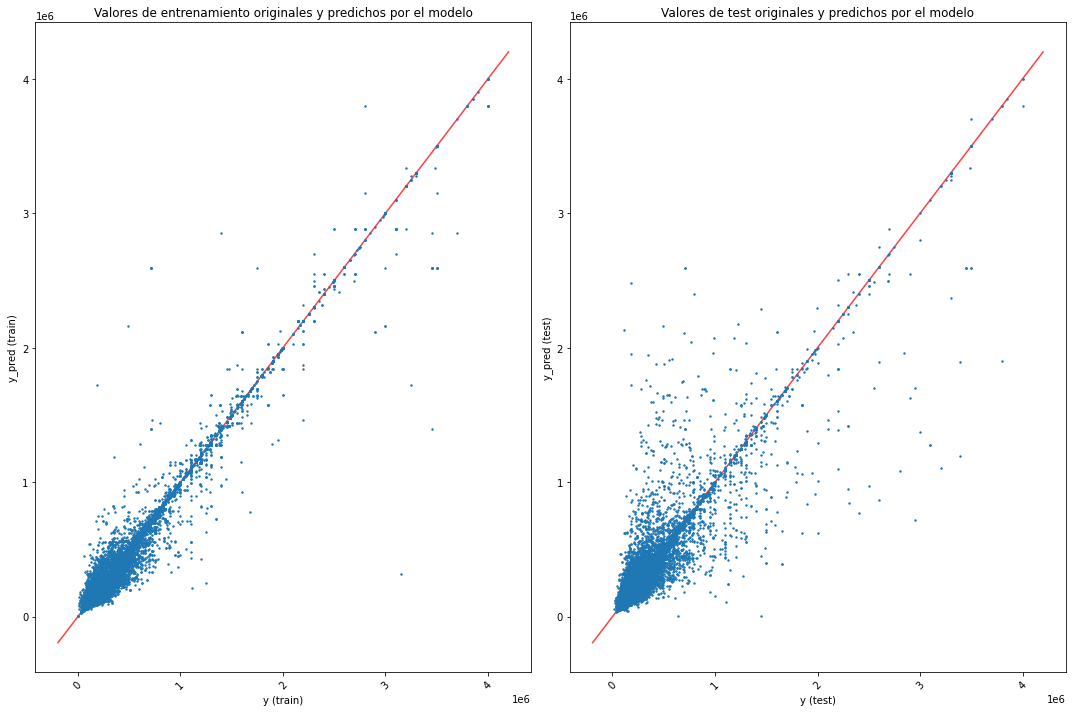

In [36]:
KNN_15.mostrarResultadosGraficos()

Para tener un diagnóstico más claro del desempeño de los modelos y para comparar los mismos, procederemos a construir una tabla con los modelos y sus respectivos errores.

**Evaluación de Resultados:**

Observemos una tabla que ilustra el desempeño de cada modelo según las métricas de evaluación descritas anteriormente:

In [37]:
errores = {
    'Modelos': ['Benchmark', 'Arbol 3', 'Vecinos 3', 'Arbol 15', 'Vecinos 15'],
    'MSE_TRAIN': [Benchmark.mse_train, Arbol.mse_train, KNN.mse_train, 
                  Arbol_15.mse_train, KNN_15.mse_train],
    'MSE_TEST': [Benchmark.mse_test, Arbol.mse_test, KNN.mse_test, 
                  Arbol_15.mse_test, KNN_15.mse_test],
    'RMSE_TRAIN': [Benchmark.rmse_train, Arbol.rmse_train, KNN.rmse_train, 
                  Arbol_15.rmse_train, KNN_15.rmse_train],
    'RMSE_TEST': [Benchmark.rmse_test, Arbol.rmse_test, KNN.rmse_test, 
                  Arbol_15.rmse_test, KNN_15.rmse_test],
    'R2_TRAIN': [Benchmark.r2_train, Arbol.r2_train, KNN.r2_train, 
                  Arbol_15.r2_train, KNN_15.r2_train],
    'R2_TEST': [Benchmark.r2_test, Arbol.r2_test, KNN.r2_test, 
                  Arbol_15.r2_test, KNN_15.r2_test]
}
tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'MSE_TRAIN', 'MSE_TEST', 
                                                 'RMSE_TRAIN', 'RMSE_TEST', 
                                                'R2_TRAIN', 'R2_TEST'])

In [38]:
tabla_errores.style

,Modelos,MSE_TRAIN,MSE_TEST,RMSE_TRAIN,RMSE_TEST,R2_TRAIN,R2_TEST
0,Benchmark,90301968659.465790,87195157166.783051,300502.859653,295288.261139,-0.000000,-0.000000
1,Arbol 3,2973962008.128510,20663562484.048256,54534.044487,143748.260804,0.967066,0.763019
2,Vecinos 3,2983664457.818048,15374113986.822569,54622.929781,123992.394875,0.966959,0.823682
3,Arbol 15,5688729125.313543,21397071536.550766,75423.664226,146277.378759,0.937003,0.754607
4,Vecinos 15,3013952675.785652,15309613058.781517,54899.477919,123732.021154,0.966624,0.824421


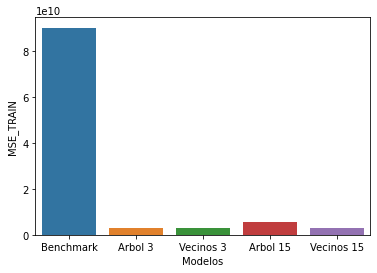

In [39]:
sns.barplot(x = 'Modelos', y = 'MSE_TRAIN', data = tabla_errores)

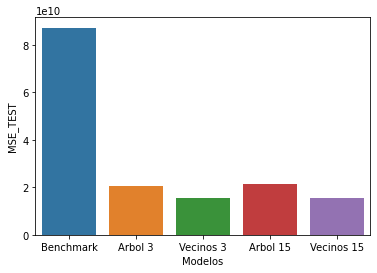

In [40]:
sns.barplot(x = 'Modelos', y = 'MSE_TEST', data = tabla_errores)

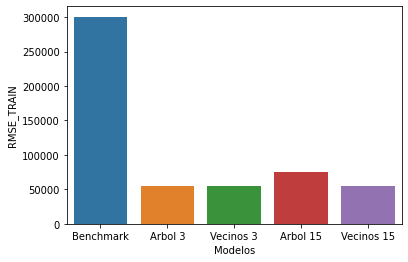

In [41]:
sns.barplot(x = 'Modelos', y = 'RMSE_TRAIN', data = tabla_errores)

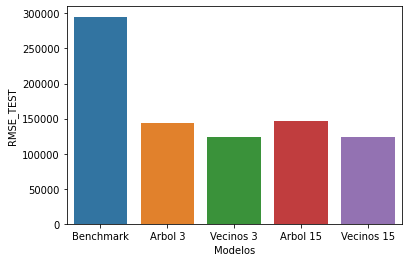

In [42]:
sns.barplot(x = 'Modelos', y = 'RMSE_TEST', data = tabla_errores)

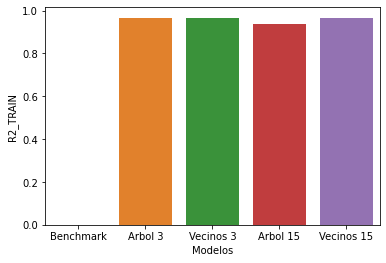

In [43]:
sns.barplot(x = 'Modelos', y = 'R2_TRAIN', data = tabla_errores)

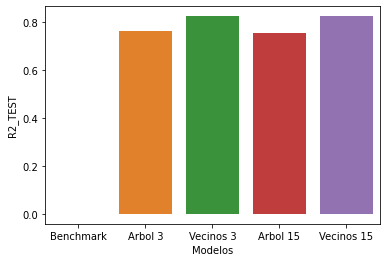

In [44]:
sns.barplot(x = 'Modelos', y = 'R2_TEST', data = tabla_errores)

Observamos que en ambos casos hay una mejora de desempeño al cambiar el hiperparámetro a 15 ilustrado en las métricas.

**Conclusión**

- Ambos modelos tanto con los hiperparámetros valuados en 3 como en 15 superan el desempeño del modelo de Benchmark optado.
- El modelo de regresión de vecinos más cercanos con el hiperparámetro de 15 vecinos es el que mejor predice, mejor que el del Árbol de Decisiones. Se puede apreciar que la dispersión de los puntos en el gráfico de los modelos de regresión por vecinos más cercanos está más próxima a la recta que la del árbol de decisiones. Sin embargo resulta ser un modelo con un error bastante alto.
- Quizas sería mejor simplificar los features y trabajar con 2 o 3 sin tanta correlación en lugar de 6. Hay varios features con una correlación muy elevada entre sí que pueden estar perjudicando el desempeño.
- Hay mucho peso de ciertas categorías como por ejemplo mucha presencia de tipos de propiedades como los departamentos o de barrios como el de Palermo...